In [1]:
#%matplotlib notebook
import numpy as np
import statistics
import matplotlib.pyplot as plt
import math
import pickle
import scipy.sparse as sp
from zlib import crc32
from scipy.io import loadmat

import sys
sys.path.insert(1, '../src/median_methods')

import median_methods as methods
import plots
import system_generation as sysgen

## Real Data Experiments

<ipython-input-4-d67ee5472f2e>:16: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  soln = np.linalg.lstsq(Ahat,bhat)


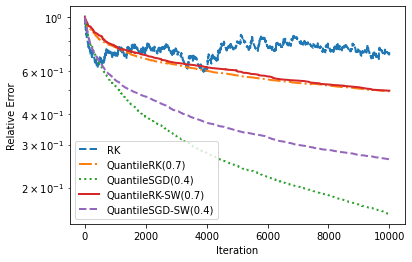

In [4]:
tomo = loadmat('Tomography.mat')

A = tomo['A']
b = tomo['b']
corrind = tomo['corrind']-1
    
A,b,zerorows = sysgen.row_normalize(A,b)
b[corrind] = b[corrind] + np.random.uniform(-5, 5, b[corrind].shape)

rows,cols = A.shape
indices = np.arange(rows)
goodind = np.setdiff1d(indices, corrind)
Ahat = A[goodind]
bhat = b[goodind]

soln = np.linalg.lstsq(Ahat,bhat)
soln = soln[0]

iters = 10000

start = np.zeros(cols)
start_data = [A,b,start]

rk = methods.RK(*start_data)
sample_rk = methods.SampledQuantileRK(*start_data, quantile=0.7, samples=100)
sample_sgd = methods.SampledQuantileSGD(*start_data, quantile=0.4, samples=100)
sw_rk = methods.SWQuantileRK(*start_data, quantile=0.7, window_size=100)
sw_sgd = methods.SW_SGD(*start_data, quantile=0.4, window_size=100)
#fixed_sgd = methods.FixedStepSGD(*start_data,eta=0.1)
#opt_sgd = methods.OptSGD(*start_data, soln=soln)

method_list = [
[rk, "RK"], 
[sample_rk, "QuantileRK(0.7)"], 
[sample_sgd, "QuantileSGD(0.4)"],
[sw_rk,"QuantileRK-SW(0.7)"], 
[sw_sgd, "QuantileSGD-SW(0.4)"]
#[fixed_sgd, "fixed_sgd"], 
#[opt_sgd, "opt_sgd"]
]

linedesigns = [
#[linestyle info, linewidth, markersize, markevery] 
['--',2,12,1000],
['-.',2,12,1000],
[':',2,12,1000],
['-',2,12,1000],
['--',2,7,1000]
#['v--',2,7,1000],
#['v--',2,7,1000]
]

plots.make_plot(method_list, iters, soln,file_name='tomo',linedesigns=linedesigns)
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Relative Error')
plt.savefig('tomo')
plt.show()

<ipython-input-5-f218e7877042>:18: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  soln = np.linalg.lstsq(Ahat,bhat)


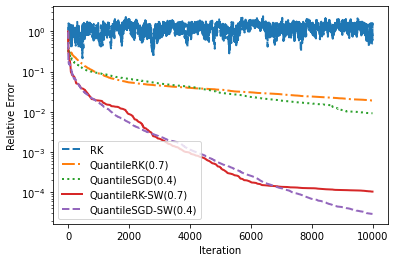

In [5]:
wbc = loadmat('WisconsinBreastCancer.mat')

A = wbc['A']
b = wbc['b']
corrind = wbc['corrind']-1
    
A,b,zerorows = sysgen.row_normalize(A,b)
#print(A[1,:])
#print(b[1])
b[corrind] = b[corrind] + np.random.uniform(-5, 5, b[corrind].shape)

rows,cols = A.shape
indices = np.arange(rows)
goodind = np.setdiff1d(indices, corrind)
Ahat = A[goodind]
bhat = b[goodind]

soln = np.linalg.lstsq(Ahat,bhat)
soln = soln[0]
    
nonzerorows = np.setdiff1d(indices,zerorows)
A = A[nonzerorows]
b = b[nonzerorows]

iters = 10000
start = 99*np.ones(cols)
start_data = [A,b,start]

rk = methods.RK(*start_data)
sample_rk = methods.SampledQuantileRK(*start_data, quantile=0.7, samples=100)
sample_sgd = methods.SampledQuantileSGD(*start_data, quantile=0.4, samples=100)
sw_rk = methods.SWQuantileRK(*start_data, quantile=0.7, window_size=100)
sw_sgd = methods.SW_SGD(*start_data, quantile=0.4, window_size=100)
#fixed_sgd = methods.FixedStepSGD(*start_data,eta=0.1)
#opt_sgd = methods.OptSGD(*start_data, soln=soln)

method_list = [
[rk, "RK"], 
[sample_rk, "QuantileRK(0.7)"], 
[sample_sgd, "QuantileSGD(0.4)"],
[sw_rk,"QuantileRK-SW(0.7)"], 
[sw_sgd, "QuantileSGD-SW(0.4)"] 
#[fixed_sgd, "fixed_sgd"], 
#[opt_sgd, "OptSGD"]
]

linedesigns = [
#[linestyle info, linewidth, markersize, markevery] 
['--',2,12,1000],
['-.',2,12,1000],
[':',2,12,1000],
['-',2,12,1000],
['--',2,7,1000]
#['v--',2,7,1000],
#['v--',2,7,1000]
]

plots.make_plot(method_list, iters, soln,file_name='wbc',linedesigns=linedesigns)
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Relative Error')
#plt.legend(loc='lower left')
plt.savefig('wbc')
plt.show()

In [ ]:
soln

## Gaussian Test

In [ ]:
rows, cols, errs, iters = 50000, 100, 10000, 10000
A,b,soln = sysgen.normalized_gaussian_with_errors(rows, cols, errs, max_error=1)
start = np.zeros(cols)

start_data = [A,b,start]

rk = methods.RK(*start_data)
sample_rk = methods.SampledQuantileRK(*start_data, quantile=0.7, samples=100)
sample_sgd = methods.SampledQuantileSGD(*start_data, quantile=0.4, samples=100)
sw_rk = methods.SWQuantileRK(*start_data, quantile=0.7, window_size=100)
sw_sgd = methods.SW_SGD(*start_data, quantile=0.4, window_size=100)
#fixed_sgd = methods.FixedStepSGD(*start_data,eta=0.1)
#opt_sgd = methods.OptSGD(*start_data, soln=soln)

method_list = [
[rk, "RK"], 
[sample_rk, "QuantileRK"], 
[sample_sgd, "QuantileSGD"],
[sw_rk,"QuantileRK-SW"], 
[sw_sgd, "QuantileSGD-SW"], 
#[fixed_sgd, "fixed_sgd"], 
#[opt_sgd, "OptSGD"]
]

linedesigns = [
#[linestyle info, linewidth, markersize, markevery] 
['',2,12,1000],
['--',2,12,1000],
['-.',2,12,1000],
[':',2,12,1000],
['o-',2,7,1000],
#['v--',2,7,1000],
#['v--',2,7,1000]
]

plots.make_plot(method_list, iters, soln,file_name='jtest',linedesigns=linedesigns)
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.show()

In [ ]:
#open and save figure from pre-pickling
pickle.load(open('jtest.pickle', 'rb'))
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()

In [ ]:
#define linestyles
linedesigns = [
#[linestyle info, linewidth, markersize, markevery] 
['g',2,12,1000],
['b--',2,12,1000],
['r-.',2,12,1000],
['c:',2,12,1000],
['ko-',2,7,1000],
['mv--',2,7,1000]
]

#create newfigure and plot lines from old figure with new style
plt.figure()
lineind = 0
for line in ax.lines:
    xd = line.get_xdata()
    yd = line.get_ydata()
    linedesign = linedesigns[lineind]
    plt.semilogy(xd,yd,linedesign[0],linewidth=linedesign[1],markersize=linedesign[2],markevery=linedesign[3])
    lineind = lineind + 1
plt.legend(handles,labels)
plt.show()